# **SPAM EMAIL CLASSIFICATION**

## About Dataset

### Dataset Name: 
Spam Email Dataset

### Description:
This dataset contains a collection of email text messages, labeled as either spam or not spam. Each email message is associated with a binary label, where "1" indicates that the email is spam, and "0" indicates that it is not spam. The dataset is intended for use in training and evaluating spam email classification models.

### Columns:
* **text (Text):** This column contains the text content of the email messages. It includes the body of the emails along with any associated subject lines or headers.
* **spam_or_not (Binary):** This column contains binary labels to indicate whether an email is spam or not. "1" represents spam, while "0" represents not spam.

### Usage:
This dataset can be used for various Natural Language Processing (NLP) tasks, such as text classification and spam detection. Researchers and data scientists can train and evaluate machine learning models using this dataset to build effective spam email filters.

In [1]:
%pip install nltk
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from wordcloud import WordCloud
import string
import re

In [3]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Projects/Spam Email Classification/emails.csv")

In [4]:
df.sample(5)

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
4266,"Subject: re : fw : gmm - 30 mar 2001 jeff , ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5362,Subject: valuation methodology we ' ve had a ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5128,Subject: re : the spreadsheet for talon deal ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1666,Subject: re : my model for spikes dear vince ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Subject: breaking news : e - mail margin - bot...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(5730, 110)

Steps:
1. Data cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Columns: 110 entries, text to Unnamed: 109
dtypes: float64(1), object(109)
memory usage: 4.8+ MB


In [7]:
df.columns

Index(['text', 'spam', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103',
       'Unnamed: 104', 'Unnamed: 105', 'Unnamed: 106', 'Unnamed: 107',
       'Unnamed: 108', 'Unnamed: 109'],
      dtype='object', length=110)

In [8]:
# Keep first 2 columns only
df.drop(columns=df.columns.difference(["text", "spam"]), inplace=True)


In [9]:
df.columns

Index(['text', 'spam'], dtype='object')

In [10]:
df.sample(5)

,text,spam
1973,Subject: re : thursday night ' s dinner ( and ...,0
1056,Subject: investment opportunity . dear friend...,1
397,"Subject: perfect logo charset = koi 8 - r "" > ...",1
1274,Subject: esecure online pharmacies cialis off...,1
3269,Subject: re : job application thank you . nu...,0


In [11]:
# Missing values
df.isnull().sum()

text    0
spam    2
dtype: int64

In [12]:
df[df["spam"].isnull()]

,text,spam
1380,Subject: from the enron india newsdesk - april...,NaN
2651,Subject: from the enron india newsdesk - april...,NaN


In [13]:
# Removing null values
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [15]:
df.shape

(5728, 2)

In [16]:
# Duplicate values
df.duplicated().sum()

np.int64(33)

In [17]:
# Removing duplicate values
df= df.drop_duplicates(keep="first")

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5695, 2)

## Exploratory Data Analysis

In [20]:
df.sample(10)

,text,spam
2573,Subject: fw : eprm article any feedback on th...,0
3910,Subject: renshi zhang ' s resume shirley and ...,0
4776,"Subject: re : cairn gas purchase bid vince , ...",0
5674,Subject: skunkworks meeting - bi - weekly shi...,0
4981,Subject: the latest ( last ? ) . . as columbo...,0
4708,"Subject: propane prices vince , please find ...",0
267,"Subject: localized software , all languages av...",1
2404,Subject: re : status of enron project howard ...,0
2519,"Subject: re : weatherwise thanks , brian . do...",0
5235,Subject: entouch newsletter business highligh...,0


In [21]:
df["spam"].value_counts()

spam
0                                                                                               4325
1                                                                                               1368
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: count, dtype: int64

In [22]:
df = df[df["spam"].isin(["0", "1"])]


In [23]:
df["spam"]=LabelEncoder().fit_transform(df["spam"])

In [24]:
df["spam"].value_counts()

spam
0    4325
1    1368
Name: count, dtype: int64

In [25]:
df.shape

(5693, 2)

([<matplotlib.patches.Wedge at 0x278c9fe69f0>,
 [Text(-0.8011671487152496, 0.7537447842734816, 'Ham'),
  Text(0.8011670349029446, -0.7537449052463467, 'Spam')],
 [Text(-0.43700026293559063, 0.4111335186946263, '75.97'),
  Text(0.43700020085615154, -0.41113358467982547, '24.03')])

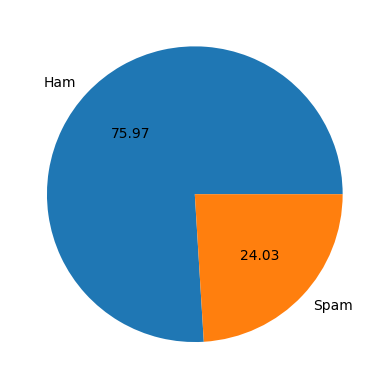

In [26]:
# Pie Chart

plt.pie(df["spam"].value_counts(), labels=["Ham","Spam"], autopct="%0.2f")

Data is imbalanced

In [27]:
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
df.sample(5)

,text,spam
1382,Subject: tuesday morning meeting first thing ?...,0
794,Subject: http : / / www . jumpsociety . com h...,1
3508,"Subject: re : follow - up thanks , vince , th...",0
1899,"Subject: resumes charlene , i am sending you...",0
1743,Subject: bi - weekly transmission update repor...,0


In [29]:
df["no_of_characters"]=df["text"].apply(len)

In [30]:
df.sample(5)

,text,spam,no_of_characters
3578,Subject: re : telephone interview with the enr...,0,2610
1061,Subject: highest concentration of pure human p...,1,1087
5521,Subject: enron research and ebs engineering an...,0,1155
5343,Subject: re : seminar on beyond ols i have re...,0,1193
580,Subject: here is the place to find the one you...,1,201


In [31]:
df["no_of_words"]= df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.sample(5)

,text,spam,no_of_characters,no_of_words
1350,Subject: re : wall street micro news report h...,1,9278,1637
2587,Subject: it was great talking with you . dave...,0,231,65
1289,Subject: lowest mortgage loan rates vkp comme...,1,634,143
3469,"Subject: re : charles shen thanks so much , v...",0,1992,446
1420,Subject: re : rabi de anything we can do ? -...,0,1357,357


In [33]:
df["no_of_sentences"]= df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.sample(5)

,text,spam,no_of_characters,no_of_words,no_of_sentences
513,Subject: promote your business the power of e...,1,3590,590,41
150,"Subject: when we say free , we mean free ! to...",1,1614,299,26
753,Subject: affordable - the way medications shou...,1,343,68,10
1295,Subject: get big money at this casino site cl...,1,1286,277,21
4716,"Subject: re : vacation shirley , no problem ...",0,348,82,4


In [35]:
df[["no_of_characters","no_of_words","no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5693.000000,5693.000000,5693.000000
mean,1543.176357,325.370455,19.359213
std,1886.930449,391.332918,35.563051
min,13.000000,3.000000,1.000000
25%,508.000000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1891.000000,402.000000,22.000000
max,31055.000000,6350.000000,1565.000000


In [36]:
# Ham
df[df["spam"]==0][["no_of_characters","no_of_words","no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4325.000000,4325.000000,4325.000000
mean,1614.634682,343.549595,19.702428
std,1742.033484,368.421291,37.605817
min,13.000000,3.000000,1.000000
25%,577.000000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.000000,440.000000,22.000000
max,31055.000000,6350.000000,1565.000000


In [37]:
# Spam
df[df["spam"]==1][["no_of_characters","no_of_words","no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


Text(0.5, 1.0, 'Histogram of Number of Characters')

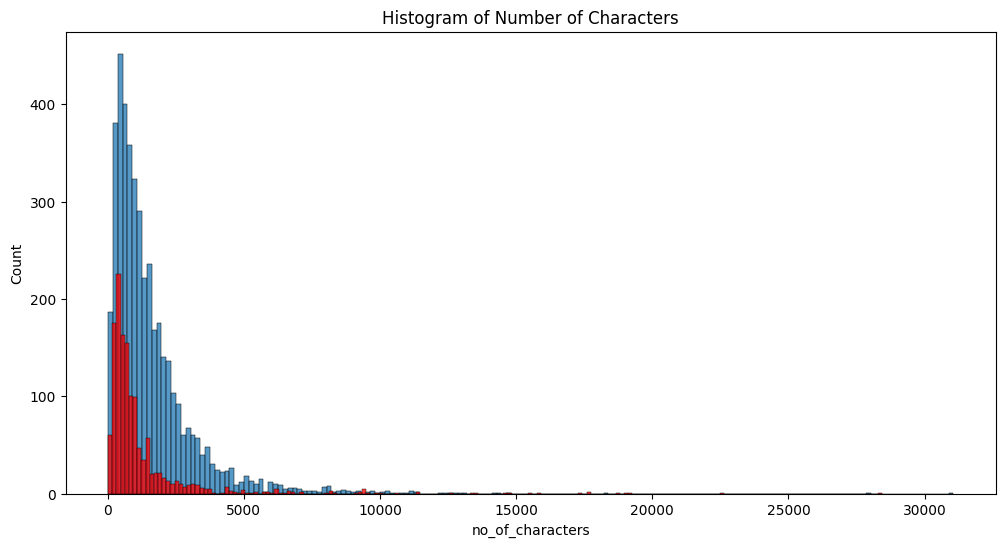

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["spam"]==0]["no_of_characters"])
sns.histplot(df[df["spam"]==1]["no_of_characters"],color="red")
plt.title("Histogram of Number of Characters")

* Both Spam and Ham distributions for Number of Characters are positively-skewed.
* In the short–medium range, ham and spam overlap heavily.
* So no_of_characters alone cannot classify spam emails.

Text(0.5, 1.0, 'Histogram of Number of Words')

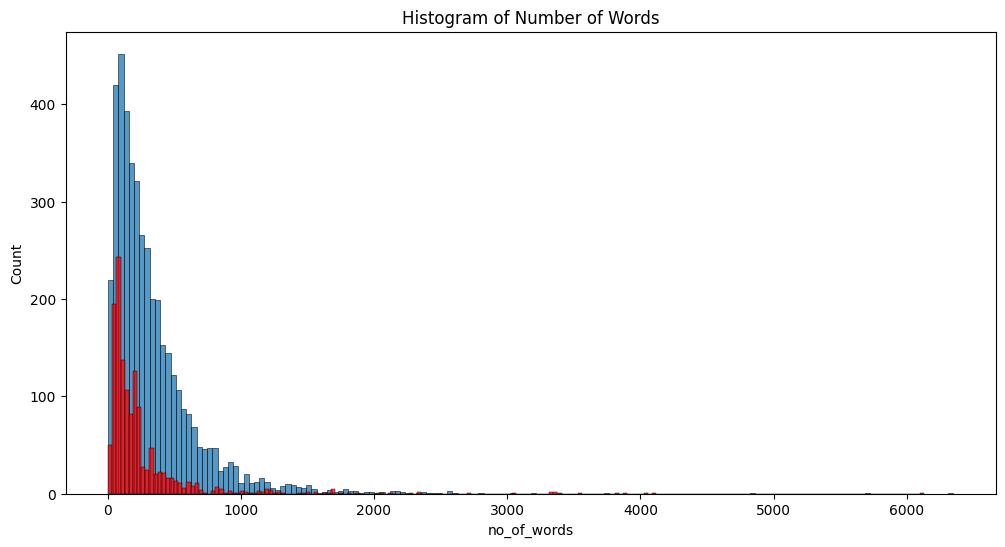

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["spam"]==0]["no_of_words"])
sns.histplot(df[df["spam"]==1]["no_of_words"],color="red")
plt.title("Histogram of Number of Words")

* Both Spam and Ham distributions for Number of Words are positively-skewed.
* In the short–medium range, ham and spam overlap heavily.
* So no_of_words alone cannot classify spam emails.

Text(0.5, 1.0, 'Histogram of Number of Sentences')

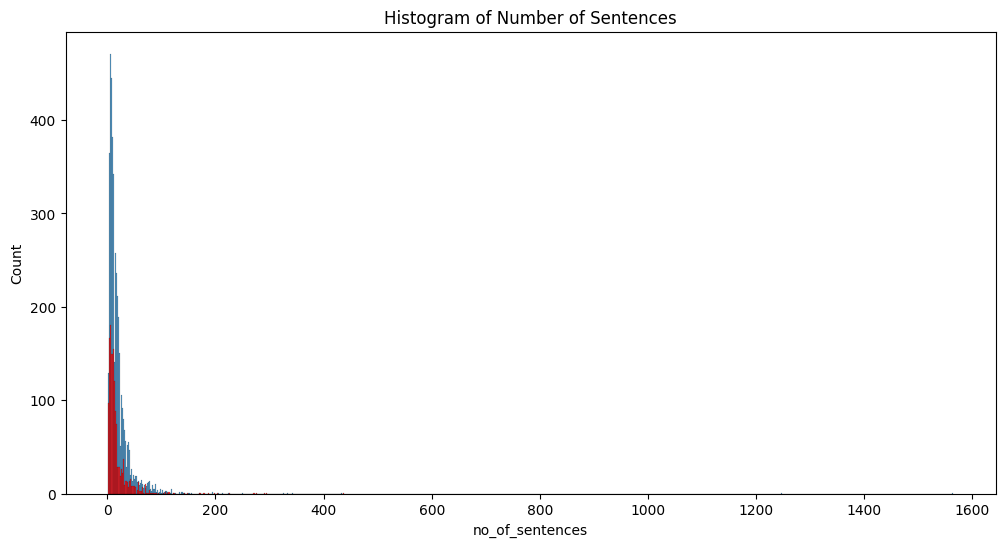

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["spam"]==0]["no_of_sentences"])
sns.histplot(df[df["spam"]==1]["no_of_sentences"],color="red")
plt.title("Histogram of Number of Sentences")

* Both Spam and Ham distributions for Number of Sentences are positively-skewed.
* In the short–medium range, ham and spam overlap heavily.
* So no_of_sentences alone cannot classify spam emails.

Text(0.5, 1.02, 'Pairplot of Email Features by Class')

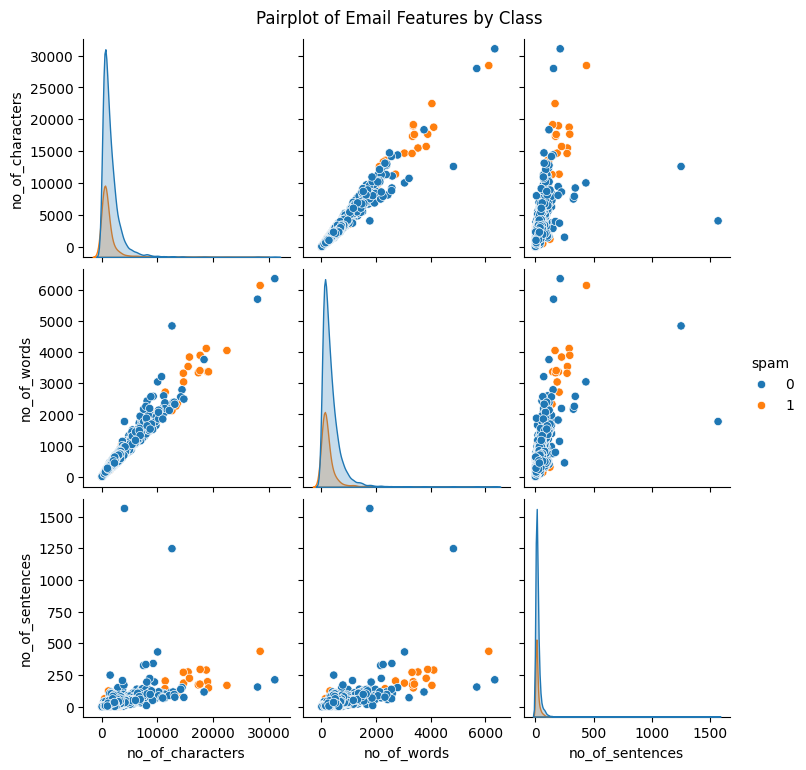

In [41]:
pair = sns.pairplot(df, hue="spam")
pair.figure.suptitle("Pairplot of Email Features by Class", y=1.02)

The pairplot shows strong linear dependence between character and word counts, indicating redundancy among length-based features. Spam emails are generally shorter, while long emails are predominantly ham. However, significant overlap exists in the lower ranges, suggesting that length features alone are insufficient for accurate classification

Text(0.5, 1.0, 'Correlation Plot')

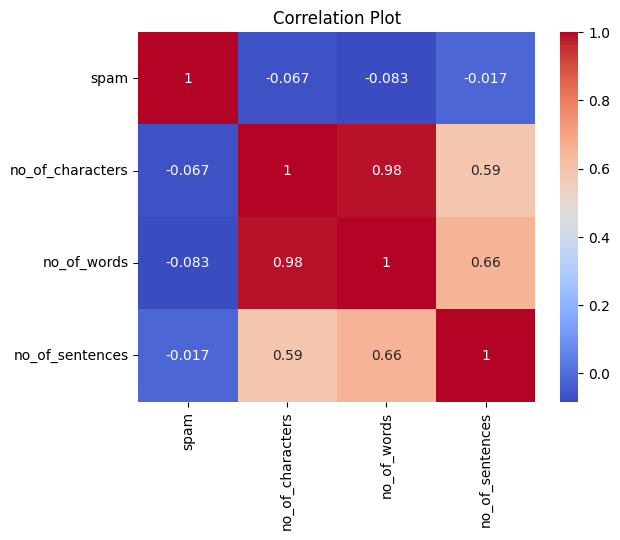

In [42]:
cor = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
cor.set_title("Correlation Plot")

Almost no linear relationship exists between length of emails and whether the email is spam or not.

## Text Preprocessing

* Converting to lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [43]:
ps=PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
def transform_text(text):
    
    text = re.sub(r'^\s*subject\s*:\s*', '', text, flags=re.IGNORECASE)
    
    text= text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
         
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)    # .join(y) joins all elements of y using a space in between

In [45]:
df["transformed_text"]= df["text"].apply(transform_text)

In [46]:
df.sample(5)

,text,spam,no_of_characters,no_of_words,no_of_sentences,transformed_text
4082,"Subject: re : one more thing clayton , i agr...",0,1046,212,8,one thing clayton agre would happen insuffici ...
3584,Subject: resid fx option - - - - - - - - - - ...,0,470,136,2,resid fx option forward zimin lu hou ect 08 17...
4851,Subject: welcome to - energy news live dear v...,0,1254,250,18,welcom energi news live dear vincent kaminski ...
206,Subject: give your partner more pleasure the ...,1,1235,242,10,give partner pleasur longz system capsul free ...
5100,Subject: tim hiezenrader stinson gibner wante...,0,319,62,2,tim hiezenrad stinson gibner want pass along n...


In [47]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [48]:
spam_wc=wc.generate(df[df["spam"]==1]["transformed_text"].str.cat(sep=" "))
ham_wc=wc.generate(df[df["spam"]==0]["transformed_text"].str.cat(sep=" "))

Text(0.5, 1.0, 'Spam WordCloud')

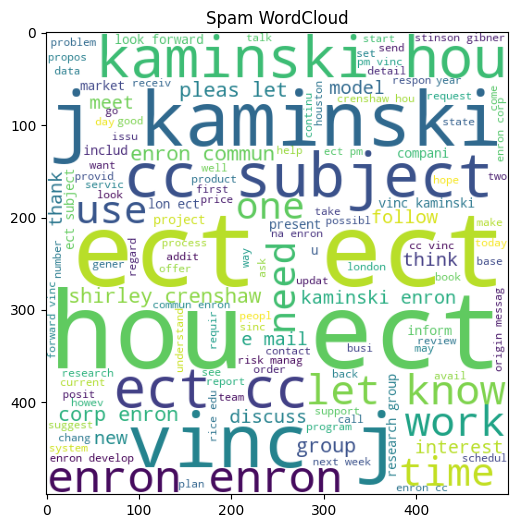

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title("Spam WordCloud")

Text(0.5, 1.0, 'Ham WordCloud')

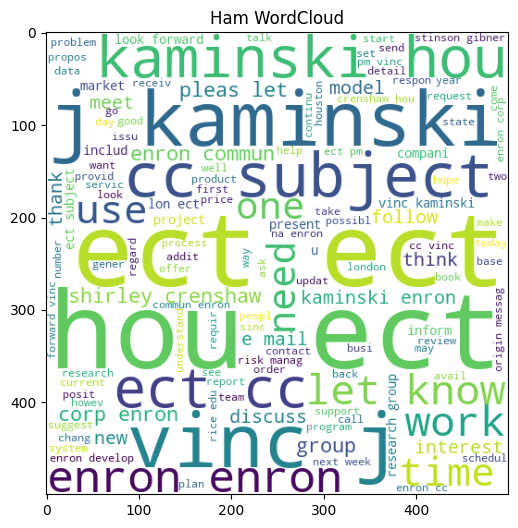

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title("Ham WordCloud")

In [51]:
spam_corpus=[]
for email in df[df["spam"]==1]["transformed_text"].tolist():
    for word in email.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

173262

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41360\3611946926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_df, x="word", y="frequency",palette="coolwarm")


Text(0.5, 1.0, 'Top 30 Most Frequent Words in Spam Emails')

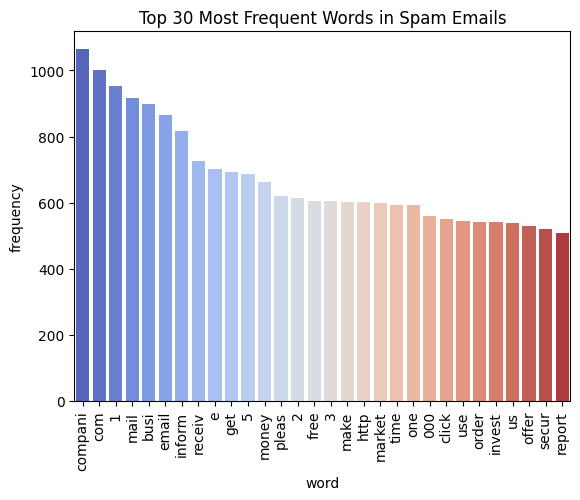

In [53]:
spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=["word", "frequency"]
)
sns.barplot(data=spam_df, x="word", y="frequency",palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Words in Spam Emails")

Most frequent is 'compani'.

In [54]:
ham_corpus=[]
for email in df[df["spam"]==0]["transformed_text"].tolist():
    for word in email.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

690107

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41360\9621742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_df, x="word", y="frequency",palette="coolwarm")


Text(0.5, 1.0, 'Top 30 Most Frequent Words in Ham Emails')

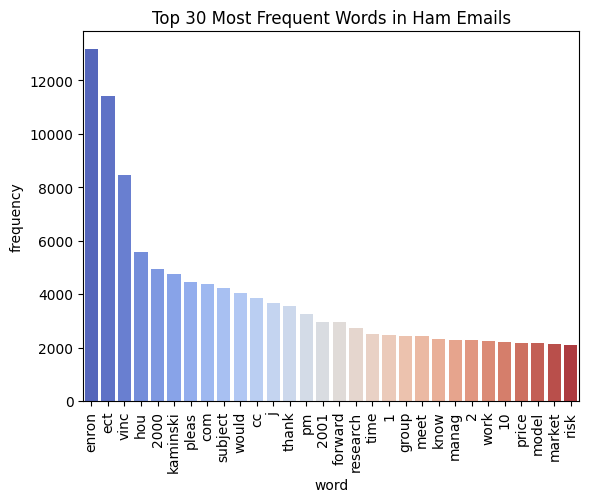

In [56]:
ham_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=["word", "frequency"]
)
sns.barplot(data=ham_df, x="word", y="frequency",palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Words in Ham Emails")

Most frequent is 'enron'.

In [57]:
df.sample(5)

,text,spam,no_of_characters,no_of_words,no_of_sentences,transformed_text
4415,"Subject: re : job posting vince , thank you ...",0,4480,915,53,job post vinc thank much appli posit yesterday...
2801,Subject: california update - urgent please rea...,0,1549,286,11,california updat urgent pleas read 5 7 01 sour...
2774,Subject: mit research on bandwidth pricing ge...,0,2596,503,24,mit research bandwidth price gentlemen amit fo...
3747,Subject: re : invitation to speak at infocast ...,0,3123,632,45,invit speak infocast upcom market price volati...
4167,Subject: global technology organization change...,0,2768,463,26,global technolog organ chang global technolog ...


## Model Building & Evaluation

Text Vectorization is being done using TfIdf. 

TF-IDF is being used to transform email text into meaningful numerical features by emphasizing discriminative words while reducing the influence of common terms, making it well suited for spam email classification.

| Step | Process | Description |
|-----:|---------|-------------|
| 1 | **Raw Data** | Text documents with corresponding labels |
| 2 | **Text Cleaning** | Convert to lowercase, remove punctuation, remove stopwords, apply stemming |
| 3 | **Cleaned Text + Labels** | Preprocessed text retained with original labels |
| 4 | **Train–Test Split** | Split performed on cleaned text (not on extracted features) |
|  |  | **X_train_text, y_train** → training documents |
|  |  | **X_test_text, y_test** → unseen test documents |
| 5 | **TF-IDF Fit** | TF-IDF vectorizer fitted **only on training text** (learns vocabulary and IDF weights) |
| 6 | **TF-IDF Transform (Train)** | Training text transformed into TF-IDF features |
|  |  | Output: **X_train_tfidf** (fixed feature space, e.g., 3000 features) |
| 7 | **TF-IDF Transform (Test)** | Test text transformed using the same fitted TF-IDF vectorizer (no learning) |
|  |  | Output: **X_test_tfidf** (same feature space as training data) |
| 8 | **Optional Scaling** | Scaler fitted on **X_train_tfidf** and applied to both train and test sets |
| 9 | **Model Training** | Train the model using **X_train_tfidf** and **y_train** |
| 10 | **Model Evaluation** | Evaluate performance on **X_test_tfidf** and **y_test** |


In [58]:
tfidf= TfidfVectorizer(max_features=3000)
scaler=MinMaxScaler()

In [59]:
X = df["transformed_text"]   # raw cleaned text (strings)
y = df["spam"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=444
)

In [60]:
X.shape

(5693,)

In [61]:
X.head()

0    natur irresist corpor ident lt realli hard rec...
1    stock trade gunsling fanni merril muzo colza a...
2    unbeliev new home made easi im want show homeo...
3    4 color print special request addit inform cli...
4    money get softwar cd softwar compat great grow...
Name: transformed_text, dtype: object

In [62]:
y=df["spam"].values

In [63]:
y

array([1, 1, 1, ..., 0, 0, 0], shape=(5693,))

In [64]:
X_train = tfidf.fit_transform(X_train)
X_test= tfidf.transform(X_test)

In [65]:
X_train=scaler.fit_transform(X_train.toarray())
X_test=scaler.transform(X_test.toarray())

In [66]:
skf = StratifiedKFold(
    n_splits=4,
    shuffle=True,
    random_state=444
)

In [67]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
cnb=ComplementNB()

In [68]:
# Gaussian Naive Bayes
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]     # Portion of the largest variance of all features that is added to variances for calculation stability.
}

gs_gnb = GridSearchCV(gnb, param_grid_gnb, cv=skf, scoring='precision', n_jobs=-1)
gs_gnb.fit(X_train, y_train)

print("GaussianNB Best Parameters:", gs_gnb.best_params_)
print("GaussianNB Best Score:", gs_gnb.best_score_)

y_pred_gnb = gs_gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_gnb))
print("GaussianNB Precision:", precision_score(y_test, y_pred_gnb))

GaussianNB Best Parameters: {'var_smoothing': 1e-05}
GaussianNB Best Score: 0.9634474742535191
GaussianNB Accuracy: 0.9666374012291484
Confusion Matrix:
 [[857   8]
 [ 30 244]]
GaussianNB Precision: 0.9682539682539683


In [69]:
# Multinomial Naive Bayes
param_grid_mnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
    'fit_prior': [True, False]
}

gs_mnb = GridSearchCV(mnb, param_grid_mnb, cv=skf, scoring='precision', n_jobs=-1)
gs_mnb.fit(X_train, y_train)

print("MultinomialNB Best Parameters:", gs_mnb.best_params_)
print("MultinomialNB Best Score:", gs_mnb.best_score_)

y_pred_mnb = gs_mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_mnb))
print("MultinomialNB Precision:", precision_score(y_test, y_pred_mnb))

MultinomialNB Best Parameters: {'alpha': 1e-06, 'fit_prior': True}
MultinomialNB Best Score: 0.9904968213060045
MultinomialNB Accuracy: 0.9780509218612818
Confusion Matrix:
 [[857   8]
 [ 17 257]]
MultinomialNB Precision: 0.969811320754717


In [70]:
# Bernoulli Naive Bayes
param_grid_bnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

gs_bnb = GridSearchCV(bnb, param_grid_bnb, cv=skf, scoring='precision', n_jobs=-1)
gs_bnb.fit(X_train, y_train)

print("BernoulliNB Best Parameters:", gs_bnb.best_params_)
print("BernoulliNB Best Score:", gs_bnb.best_score_)

y_pred_bnb = gs_bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_bnb))
print("BernoulliNB Precision:", precision_score(y_test, y_pred_bnb))

BernoulliNB Best Parameters: {'alpha': 0.001, 'binarize': 0.5, 'fit_prior': True}
BernoulliNB Best Score: 0.9417712459523123
BernoulliNB Accuracy: 0.9561018437225637
Confusion Matrix:
 [[855  10]
 [ 40 234]]
BernoulliNB Precision: 0.9590163934426229


In [71]:
# Complement Naive Bayes
param_grid_cnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
    'fit_prior': [True, False]
}

gs_cnb = GridSearchCV(cnb, param_grid_cnb, cv=skf, scoring='precision', n_jobs=-1)
gs_cnb.fit(X_train, y_train)

print("ComplementNB Best Parameters:", gs_cnb.best_params_)
print("ComplementNB Best Score:", gs_cnb.best_score_)

y_pred_cnb = gs_cnb.predict(X_test)
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_cnb))
print("ComplementNB Precision:", precision_score(y_test, y_pred_cnb))

# The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

ComplementNB Best Parameters: {'alpha': 1e-07, 'fit_prior': True}
ComplementNB Best Score: 0.9839539614652432
ComplementNB Accuracy: 0.9780509218612818
Confusion Matrix:
 [[856   9]
 [ 16 258]]
ComplementNB Precision: 0.9662921348314607


Precision is highest for Multinomial NB

In [72]:
svc=SVC(kernel="sigmoid")
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression()
rfc=RandomForestClassifier(random_state=444)
abc=AdaBoostClassifier(random_state=444)
bc=BaggingClassifier(random_state=444)
etc=ExtraTreesClassifier(random_state=444)
gbdt=GradientBoostingClassifier(random_state=444)
xgb=XGBClassifier(random_state=444)

In [73]:
results=[]
confusion_matrices={}

In [74]:
# Multinomial NB
param_grid_mnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],   # Additive (Laplace/Lidstone) smoothing parameter (set alpha=0 and force_alpha=True, for no smoothing)
    'fit_prior': [True, False]     # Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
}

gs_mnb = GridSearchCV(mnb, param_grid_mnb, cv=skf, scoring='precision', n_jobs=-1,verbose=1)
gs_mnb.fit(X_train, y_train)
y_pred_mnb = gs_mnb.predict(X_test)
cm_mnb=confusion_matrix(y_test,y_pred_mnb)
confusion_matrices["MNB"]= cm_mnb
results.append(["MNB", gs_mnb.best_params_, gs_mnb.best_score_,
                accuracy_score(y_test,y_pred_mnb), precision_score(y_test, y_pred_mnb), f1_score(y_test, y_pred_mnb)
])

Fitting 4 folds for each of 14 candidates, totalling 56 fits


In [75]:
# SVC
param_grid_svc={
    "C": [0.1,1,10],
    "gamma": ["scale","auto"]
}
gs_svc=GridSearchCV(svc, param_grid_svc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_svc.fit(X_train,y_train)
y_pred_svc=gs_svc.predict(X_test)
cm_svc=confusion_matrix(y_test, y_pred_svc)
confusion_matrices["SVC"]= cm_svc
results.append(["SVC",gs_svc.best_params_,gs_svc.best_score_,
                accuracy_score(y_test,y_pred_svc), precision_score(y_test, y_pred_svc), f1_score(y_test, y_pred_svc)
])

Fitting 4 folds for each of 6 candidates, totalling 24 fits


In [76]:
# KNeighborsClassifier
param_grid_knc= {
    "n_neighbors": [3,4,5,6,7],
    "weights": ["uniform","distance"],
    "metric":["euclidean","cosine"]
}
gs_knc=GridSearchCV(knc, param_grid_knc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_knc.fit(X_train, y_train)
y_pred_knc= gs_knc.predict(X_test)
cm_knc= confusion_matrix(y_test,y_pred_knc)
confusion_matrices["KNN"]=cm_knc
results.append(["KNN", gs_knc.best_params_, gs_knc.best_score_,
                accuracy_score(y_test, y_pred_knc), precision_score(y_test, y_pred_knc), f1_score(y_test, y_pred_knc)
])

Fitting 4 folds for each of 20 candidates, totalling 80 fits


In [77]:
# DecisionTreeClassifier
param_grid_dtc={
    "max_depth":[10,20,30,None],    # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    "min_samples_split":[2,5,10],    # The minimum number of samples required to split an internal node
}
gs_dtc = GridSearchCV(dtc, param_grid_dtc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_dtc.fit(X_train, y_train)
y_pred_dtc = gs_dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
confusion_matrices["DecisionTree"] = cm_dtc
results.append(["DecisionTree", gs_dtc.best_params_, gs_dtc.best_score_, 
                accuracy_score(y_test, y_pred_dtc), precision_score(y_test, y_pred_dtc), f1_score(y_test, y_pred_dtc)
])

Fitting 4 folds for each of 12 candidates, totalling 48 fits


In [78]:
# LogisticRegression
param_grid_lrc={
    "C":[0.01, 0.1, 1, 10],   # Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    "penalty":["l2"],
    "solver":["liblinear"]  # Algorithm to use in the optimization problem.
}
gs_lrc = GridSearchCV(lrc, param_grid_lrc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_lrc.fit(X_train, y_train)
y_pred_lrc = gs_lrc.predict(X_test)
cm_lrc = confusion_matrix(y_test, y_pred_lrc)
confusion_matrices["LogisticRegression"] = cm_lrc
results.append(["LogisticRegression", gs_lrc.best_params_, gs_lrc.best_score_, 
                accuracy_score(y_test, y_pred_lrc), precision_score(y_test, y_pred_lrc), f1_score(y_test, y_pred_lrc)
])


Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [79]:
# RandomForestClassifier
param_grid_rfc={
    "n_estimators":[50,100,200],     # The number of trees in the forest.
    "max_depth":[10,20,None],      # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    "min_samples_split":[2,5],    # The minimum number of samples required to split an internal node
    "max_features": ["sqrt","log2"]   # The number of features to consider when looking for the best split
}
gs_rfc = GridSearchCV(rfc, param_grid_rfc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_rfc.fit(X_train, y_train)
y_pred_rfc = gs_rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
confusion_matrices["RandomForest"] = cm_rfc
results.append(["RandomForest", gs_rfc.best_params_, gs_rfc.best_score_, 
                accuracy_score(y_test, y_pred_rfc), precision_score(y_test, y_pred_rfc), f1_score(y_test, y_pred_rfc)
])


Fitting 4 folds for each of 36 candidates, totalling 144 fits


In [80]:
# AdaBoostClassifier
param_grid_abc={
    "n_estimators":[50,100,200],   # The maximum number of estimators at which boosting is terminated. 
    "learning_rate":[0.01,0.1,1.0]    # Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters.
}
gs_abc = GridSearchCV(abc, param_grid_abc, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_abc.fit(X_train, y_train)
y_pred_abc = gs_abc.predict(X_test)
cm_abc = confusion_matrix(y_test, y_pred_abc)
confusion_matrices["AdaBoost"] = cm_abc
results.append(["AdaBoost", gs_abc.best_params_, gs_abc.best_score_, 
                accuracy_score(y_test, y_pred_abc), precision_score(y_test, y_pred_abc), f1_score(y_test, y_pred_abc)
])

Fitting 4 folds for each of 9 candidates, totalling 36 fits


In [81]:
# BaggingClassifier
param_grid_bc={
    "n_estimators": [10,50,100],   # The number of base estimators in the ensemble.
    "max_samples": [0.5,0.7,1.0]   # The number of samples to draw from X to train each base estimator (with replacement by default
}
gs_bc = GridSearchCV(bc, param_grid_bc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_bc.fit(X_train, y_train)
y_pred_bc = gs_bc.predict(X_test)
cm_bc = confusion_matrix(y_test, y_pred_bc)
confusion_matrices['Bagging'] = cm_bc
results.append(['Bagging', gs_bc.best_params_, gs_bc.best_score_, 
                accuracy_score(y_test, y_pred_bc), precision_score(y_test, y_pred_bc), f1_score(y_test, y_pred_bc)
])

Fitting 4 folds for each of 9 candidates, totalling 36 fits


In [82]:
# ExtraTreesClassifier
param_grid_etc = {
    'n_estimators': [50, 100, 200],   # The number of trees in the forest.
    'max_depth': [10, 20, None],    # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    'min_samples_split': [2, 5],   # The minimum number of samples required to split an internal node
    'max_features': ['sqrt','log2']   # The number of features to consider when looking for the best split
}
gs_etc = GridSearchCV(etc, param_grid_etc, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_etc.fit(X_train, y_train)
y_pred_etc = gs_etc.predict(X_test)
cm_etc = confusion_matrix(y_test, y_pred_etc)
confusion_matrices['ExtraTrees'] = cm_etc
results.append(['ExtraTrees', gs_etc.best_params_, gs_etc.best_score_, 
                accuracy_score(y_test, y_pred_etc), precision_score(y_test, y_pred_etc), f1_score(y_test, y_pred_etc)
])


Fitting 4 folds for each of 36 candidates, totalling 144 fits


In [83]:
# GradientBoostingClassifier
param_grid_gbdt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gs_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_gbdt.fit(X_train, y_train)
y_pred_gbdt = gs_gbdt.predict(X_test)
cm_gbdt = confusion_matrix(y_test, y_pred_gbdt)
confusion_matrices['GradientBoosting'] = cm_gbdt
results.append(['GradientBoosting', gs_gbdt.best_params_, gs_gbdt.best_score_, 
                accuracy_score(y_test, y_pred_gbdt), precision_score(y_test, y_pred_gbdt), f1_score(y_test, y_pred_gbdt)
])

Fitting 4 folds for each of 27 candidates, totalling 108 fits


In [84]:
# XGBClassifier
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
gs_xgb = GridSearchCV(xgb, param_grid_xgb, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_xgb.fit(X_train, y_train)
y_pred_xgb = gs_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
confusion_matrices['XGBoost'] = cm_xgb
results.append(['XGBoost', gs_xgb.best_params_, gs_xgb.best_score_, 
                accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)])


Fitting 4 folds for each of 27 candidates, totalling 108 fits


In [85]:
results_df = pd.DataFrame(results, columns=['Model', 'Best Params', 'CV Score', 
                                             'Test Accuracy', 'Test Precision', 'F1 Score'])
print(results_df.to_string())

                 Model                                                                            Best Params  CV Score  Test Accuracy  Test Precision  F1 Score
0                  MNB                                                    {'alpha': 1e-06, 'fit_prior': True}  0.990497       0.978051        0.969811  0.953618
1                  SVC                                                             {'C': 10, 'gamma': 'auto'}  1.000000       0.801580        1.000000  0.298137
2                  KNN                        {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}  1.000000       0.870939        1.000000  0.633416
3         DecisionTree                                            {'max_depth': None, 'min_samples_split': 5}  0.913964       0.962248        0.920000  0.921676
4   LogisticRegression                                    {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}  1.000000       0.859526        1.000000  0.587629
5         RandomForest  {'max_dept

These results
illustrate the trade-offs between different classifiers in terms of precision, F1-score, and
overall performance, providing valuable insights for selecting the most suitable model
for the specific classification task at hand.

In [86]:
for model_name, cm in confusion_matrices.items():
    print(f"\n{model_name}:")
    print(cm)
    tn, fp, fn, tp = cm.ravel()  # Flatten the array into one dimension.
    print(f"True Negatives: {tn}, False Positives: {fp}")
    print(f"False Negatives: {fn}, True Positives: {tp}")


MNB:
[[857   8]
 [ 17 257]]
True Negatives: 857, False Positives: 8
False Negatives: 17, True Positives: 257

SVC:
[[865   0]
 [226  48]]
True Negatives: 865, False Positives: 0
False Negatives: 226, True Positives: 48

KNN:
[[865   0]
 [147 127]]
True Negatives: 865, False Positives: 0
False Negatives: 147, True Positives: 127

DecisionTree:
[[843  22]
 [ 21 253]]
True Negatives: 843, False Positives: 22
False Negatives: 21, True Positives: 253

LogisticRegression:
[[865   0]
 [160 114]]
True Negatives: 865, False Positives: 0
False Negatives: 160, True Positives: 114

RandomForest:
[[863   2]
 [ 96 178]]
True Negatives: 863, False Positives: 2
False Negatives: 96, True Positives: 178

AdaBoost:
[[851  14]
 [ 15 259]]
True Negatives: 851, False Positives: 14
False Negatives: 15, True Positives: 259

Bagging:
[[846  19]
 [ 24 250]]
True Negatives: 846, False Positives: 19
False Negatives: 24, True Positives: 250

ExtraTrees:
[[865   0]
 [183  91]]
True Negatives: 865, False Positives:

In [87]:
results_df_melt= pd.melt(results_df.drop(columns=["Best Params","CV Score"]), id_vars="Model")

In [88]:
results_df_melt

,Model,variable,value
0,MNB,Test Accuracy,0.978051
1,SVC,Test Accuracy,0.801580
2,KNN,Test Accuracy,0.870939
3,DecisionTree,Test Accuracy,0.962248
4,LogisticRegression,Test Accuracy,0.859526
5,RandomForest,Test Accuracy,0.913960
6,AdaBoost,Test Accuracy,0.974539
7,Bagging,Test Accuracy,0.962248
8,ExtraTrees,Test Accuracy,0.839333
9,GradientBoosting,Test Accuracy,0.982441


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'MNB'),
  Text(1, 0, 'SVC'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'DecisionTree'),
  Text(4, 0, 'LogisticRegression'),
  Text(5, 0, 'RandomForest'),
  Text(6, 0, 'AdaBoost'),
  Text(7, 0, 'Bagging'),
  Text(8, 0, 'ExtraTrees'),
  Text(9, 0, 'GradientBoosting'),
  Text(10, 0, 'XGBoost')])

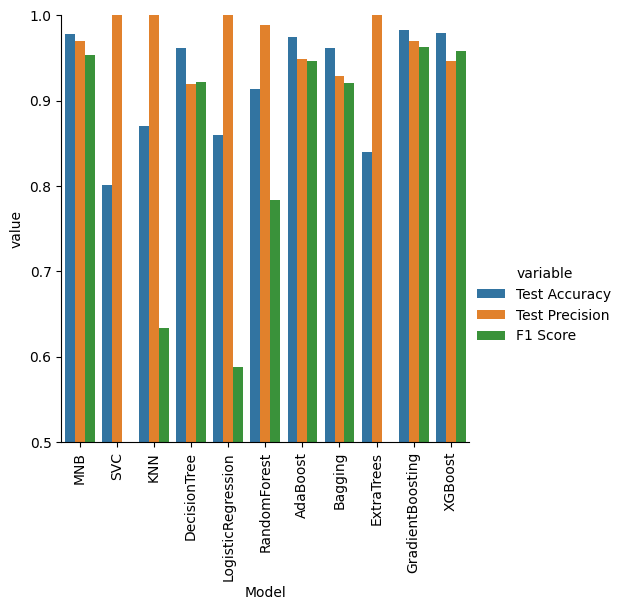

In [89]:
sns.catplot(x="Model",y="value",
            hue="variable",data=results_df_melt, kind="bar")
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")

Although several models achieve high test accuracy, accuracy is not a balanced metric for this problem due to class imbalance. Models such as SVC and Logistic Regression achieve high precision but very low F1-scores, indicating poor recall of spam emails. Gradient Boosting, XGBoost, and Multinomial Naive Bayes provide the most balanced performance and are therefore more suitable for spam classification.

In [90]:
# Voting Classifier
voting=VotingClassifier(estimators=[("MNB",gs_mnb),("GradientBoosting",gs_gbdt),("XGBoost",gs_xgb)],voting="soft")

In [91]:
voting.fit(X_train,y_train)

Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits


,estimators,"[('MNB', ...), ('GradientBoosting', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,alpha,1e-06
,force_alpha,True
,fit_prior,True
,class_prior,None
,loss,'log_loss'


In [92]:
y_pred_voting= voting.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_voting))
print("Precision: ",precision_score(y_test,y_pred_voting))
print("F1 Score: ", f1_score(y_test,y_pred_voting))

Accuracy:  0.9885864793678666
Precision:  0.9711191335740073
F1 Score:  0.9764065335753176


In [93]:
# Stacking
best_mnb = gs_mnb.best_estimator_
best_gbdt = gs_gbdt.best_estimator_ 
best_xgb = gs_xgb.best_estimator_ 
estimators=[("MNB",best_mnb),("GradientBoosting",best_gbdt),("XGBoost",best_xgb)] 
final_estimator= LogisticRegression(random_state=444)

In [94]:
sc=StackingClassifier(estimators=estimators,final_estimator=final_estimator,n_jobs=-1)

In [95]:
sc.fit(X_train,y_train)

,estimators,"[('MNB', ...), ('GradientBoosting', ...), ...]"
,final_estimator,LogisticRegre...dom_state=444)
,cv,None
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,alpha,1e-06
,force_alpha,True
,fit_prior,True
,class_prior,None


In [96]:
y_pred_sc=sc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_sc))
print("Precision: ",precision_score(y_test,y_pred_sc))
print("F1 Score: ", f1_score(y_test,y_pred_sc))

Accuracy:  0.9894644424934153
Precision:  0.9712230215827338
F1 Score:  0.9782608695652174


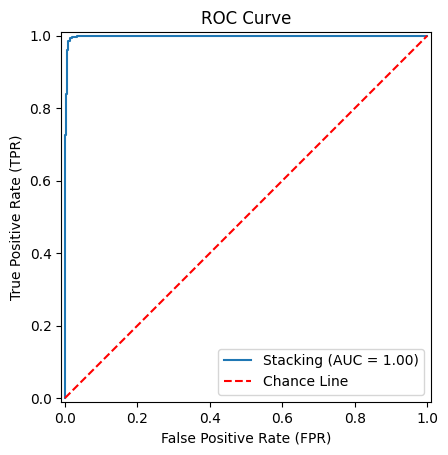

In [97]:
best = sc

# Plotting ROC curve for the best model chosen
RocCurveDisplay.from_estimator(
    best,
    X_test,
    y_test,
    name="Stacking"
)

# Adding baseline (chance line)
plt.plot([0, 1], [0, 1], 'r--', label="Chance Line")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(False)


The ROC curve lies very close to the top-left corner, and the AUC value of 1.00 indicates that the Stacking Classifier model has excellent discriminative ability. This means the model can almost perfectly distinguish between spam and ham emails across different classification thresholds. The ROC curve staying well above the red dashed chance line confirms that the model performs far better than random guessing. Overall, this result demonstrates that the classifier effectively ranks spam emails higher than legitimate emails, making it a strong and reliable model for spam email classification.


## Final Conclusion

Among all evaluated models, the **Stacking Classifier**, which combines **Multinomial Naive Bayes**, **Gradient Boosting**, and **XGBoost** with a **Logistic Regression meta-learner**, achieved the best overall performance.

It recorded a test accuracy of **0.9895**, a precision of **0.9712**, and an F1-score of **0.9783**, indicating a strong balance between correctly identifying spam emails and minimizing false positives.

The current approach relies on TF-IDF features . TF-IDF ignores word order and semantic context, which means it cannot capture meaning conveyed through phrases, sarcasm, or sentence structure. The model relies on a fixed vocabulary learned during training and may struggle to adapt to evolving spam strategies and newly emerging terms (concept drift) and also it will not generalize to other languages. Important metadata (headers, URLs, email addresses) not explicitly handled. 

Future work can explore additional models, broader hyperparameter tuning, deep learning approaches, alternative word embeddings, class imbalance handling techniques and cost-sensitive and adaptive learning strategies to improve robustness and generalization.